In [1]:
"""
1. Import Global Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

np.random.seed(0)

In [2]:
"""
2. Linear Regression
Source: Week 6 Notebook
"""

import seaborn as sns
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

np.set_printoptions(precision=4, suppress=True)


/Users/davidlarance/anaconda3/envs/ipykernal_py2/lib/python2.7/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  mplDeprecation)


In [23]:
"""
3. Load Subsetted that was created in EDA notebook and target error from raw zillow file
Note to Sullivan: I had to reverse the slashes from back to forward to work
"""

# Load the pre-subsetted data
train_data_2016 = pd.read_csv('../Data/subsetted/subsetted_training_data_2016.csv', sep=',', engine='python')
train_data_2017 = pd.read_csv('../Data/subsetted/subsetted_training_data_2017.csv', sep=',', engine='python')

# Load the label data
train_target_2016 = pd.read_csv('../Data/labels/train_2016.csv', sep=',', engine='python')
train_target_2017 = pd.read_csv('../Data/labels/train_2017.csv', sep=',', engine='python')

In [27]:
# 3. Check the data

# 3.1 Data shape
# Check the shape of the data
print("Subsetted train data shape:", train_data_2016.shape)

# Check the shape of the targets
print("Label data shape:", train_target_2016.shape)

# 3.2 Descriptive stats of train and target data
#print(train_data_2016.describe())
#train_data_2016.head(5)

#train_target_2016['logerror'].head(10)

('Subsetted train data shape:', (90275, 59))
('Label data shape:', (90275, 3))


In [39]:
# 4. Prep the data

# 4.1 Remove non int or float columns
train_data_2016 = train_data_2016.select_dtypes(['float64','int64'])

# 4.2 Remove columns from the data matrix that contain Nan values
train_data_2016 = train_data_2016.dropna(axis=1, how='any')
# If we'd rather just remove rows with a Nan, we'd need to change the axis to 0

# 4.3 Set the X and Y variables
X_2016, Y_2016 = np.asarray(train_data_2016), np.asarray(train_target_2016['logerror'])

# 4.4 Shuffle the variables
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X_2016.shape[0]))
X_2016, Y_2016 = X_2016[shuffle], Y_2016[shuffle]

print 'data shape: ', X_2016.shape
print 'target shape:', Y_2016.shape

# 4.5 Create different arrays for training and testing data.
train_data, train_labels = X_2016[:75000], Y_2016[:75000]
mini_train_data, mini_train_labels = X_2016[:1000], Y_2016[:1000]
test_data, test_labels = X_2016[75000:], Y_2016[75000:]
#dev_data, dev_labels = X_2016[75000:76000], Y_2016[75000:76000]



data shape:  (90275, 12)
target shape: (90275,)


In [43]:
# 5. Create, fit the Linear Regression classifier

# 5.1 Create and fit
linr =  LinearRegression()
linr.fit(mini_train_data, mini_train_labels)

# 5.2 Print the resulting model
print 'Estimated intercept:', linr.intercept_

print 'Estimated coefficients:', linr.coef_


 Estimated intercept: 1.1071502068636945
Estimated coefficients: [-0.      0.      0.0026  0.0063  0.0268  0.     -0.      0.0024 -0.
  0.     -0.0025  0.    ]


Text(0.5,1,u'Error vs. Predicted Error')

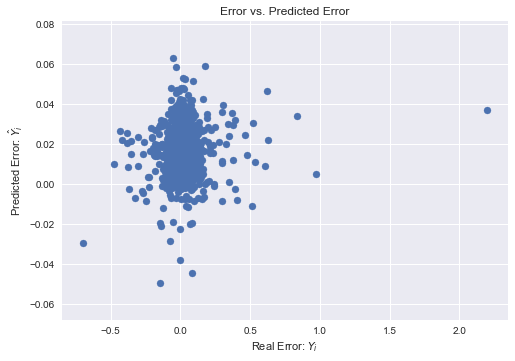

In [41]:
# 6. Test the accuracy of the classifier

plt.scatter(mini_train_labels, linr.predict(mini_train_data))
plt.xlabel("Real Error: $Y_i$")
plt.ylabel("Predicted Error: $\hat{Y}_i$")
plt.title("Error vs. Predicted Error")
           
        